# Weather Image Classification Using Deep Learning and Pre-trained Models 

# 1. Data partition, preprocessing and preparation 

## 1.1. Data partition 

In [1]:
# Import necessary libraries 
import os 
import pandas as pd 
from sklearn.model_selection import train_test_split

In [2]:
# Define the path to the dataset folder
dataset = 'dataset2'
images = []
labels = []

In [3]:
# Loop through each file in the dataset directory 
for filename in os.listdir(dataset):
    if filename.endswith('.jpg'): # Check if the file is a JPG image 
        # Extract the label by removing digits and only keeping the alphabetic part (e.g., 'cloudy1.jpg'->'cloudy')
        label = ''.join(filter(str.isalpha, filename.split('.')[0]))
        # Append the full path of the image to the images list 
        images.append(os.path.join(dataset, filename))
        # Append the extracted label to the labels list 
        labels.append(label)

In [4]:
# Create a Dataframe 
df = pd.DataFrame({'File path': images, 'Image label': labels})

To ensure the model generalizes well, the dataset is split into three partitions:
- **Training**: 70% of the data used for training the model 
- **Validation**: 15% of the data used to tune hyperparmeters and avoid overfitting 
- **Test**: 15% of the data used for evaluating the model \
The `random_state=42` ensures reproducibility of the splits. 

In [5]:
# Split the dataset into training (70%), validation (15%) and test (15%) sets
rest_df, test_df = train_test_split(df, test_size = 0.15, random_state=42) # 15% for test set 
train_df, validation_df = train_test_split(rest_df, test_size = (0.15/0.85), random_state=42) # Split remaining 85%  

In [7]:
# Save to CSV files
train_df.to_csv('my_training.csv', index=False, header=False)
validation_df.to_csv('my_validation.csv', index=False, header=False)
test_df.to_csv('my_test.csv', index=False, header=False)

In [8]:
# Display the label distribution of each partition 
label_names = df['Image label'].unique().tolist()
# Function to calculate and return the label distribution in a DataFrame.
def call_counts(df):
    from collections import Counter 
    label_counts = df['Image label'].value_counts()
    return label_counts
 
print("\nTraining Set Label Distribution:\n",call_counts(train_df))

print("\nValidation Set Label Distribution:\n",call_counts(validation_df))

print("\nTest Set Label Distribution:\n",call_counts(test_df))


Training Set Label Distribution:
 Image label
sunrise    255
cloudy     208
shine      179
rain       142
Name: count, dtype: int64

Validation Set Label Distribution:
 Image label
sunrise    52
cloudy     47
shine      39
rain       31
Name: count, dtype: int64

Test Set Label Distribution:
 Image label
sunrise    49
cloudy     45
rain       40
shine      35
Name: count, dtype: int64


In [12]:
# Display the first 10 rows of Training Set 
print("\nFirst 10 Rows of Training Set:\n", train_df.head(10))


First 10 Rows of Training Set:
                  File path Image label
0  dataset2/sunrise356.jpg     sunrise
1  dataset2/sunrise303.jpg     sunrise
2     dataset2/rain111.jpg        rain
3     dataset2/rain161.jpg        rain
4   dataset2/cloudy141.jpg      cloudy
5     dataset2/shine36.jpg       shine
6     dataset2/rain113.jpg        rain
7   dataset2/cloudy143.jpg      cloudy
8    dataset2/shine156.jpg       shine
9     dataset2/rain130.jpg        rain


In [13]:
# Display the first 10 rows of Validation Set 
print("\nFirst 10 Rows of Validation Set:\n", validation_df.head(10))


First 10 Rows of Validation Set:
                  File path Image label
0   dataset2/cloudy218.jpg      cloudy
1    dataset2/shine173.jpg       shine
2     dataset2/rain118.jpg        rain
3   dataset2/cloudy176.jpg      cloudy
4      dataset2/rain66.jpg        rain
5     dataset2/shine47.jpg       shine
6    dataset2/cloudy86.jpg      cloudy
7  dataset2/sunrise181.jpg     sunrise
8  dataset2/sunrise142.jpg     sunrise
9   dataset2/sunrise78.jpg     sunrise


In [14]:
# Display the first 10 rows of Test Set 
print("\nFirst 10 Rows of Test Set:\n", test_df.head(10))


First 10 Rows of Test Set:
                  File path Image label
0     dataset2/rain171.jpg        rain
1    dataset2/cloudy70.jpg      cloudy
2     dataset2/rain178.jpg        rain
3     dataset2/shine62.jpg       shine
4   dataset2/cloudy102.jpg      cloudy
5    dataset2/shine190.jpg       shine
6  dataset2/sunrise114.jpg     sunrise
7    dataset2/shine118.jpg       shine
8     dataset2/rain196.jpg        rain
9    dataset2/shine180.jpg       shine


### Visualize Label Distribution

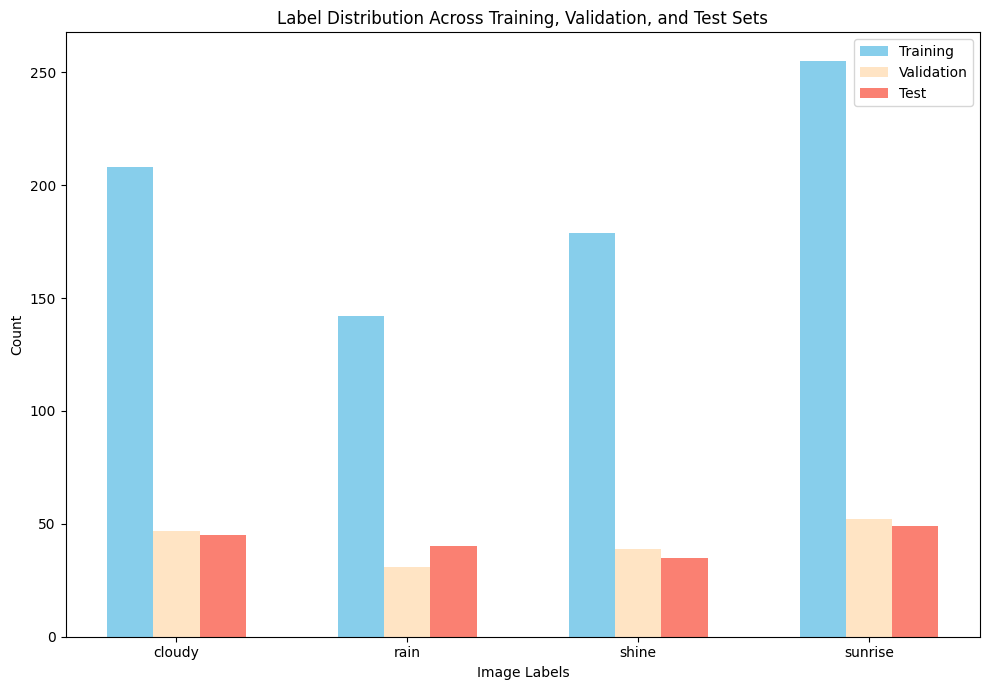

In [11]:
# Import matplotlib 
import matplotlib.pyplot as plt 
import numpy as np

# Load data 
train_df = pd.read_csv('my_training.csv', header=None, names=['File path', 'Image label'])
validation_df = pd.read_csv('my_validation.csv', header=None, names=['File path', 'Image label'])
test_df = pd.read_csv('my_test.csv', header=None, names=['File path', 'Image label'])

# Calculate label distribution for each partition 
train_distribution = train_df['Image label'].value_counts()
validation_distribution = validation_df['Image label'].value_counts()
test_distribution = test_df['Image label'].value_counts()

# Ensure the labels are aligned across all sets
labels = sorted(list(set(train_distribution.index).union(set(validation_distribution.index)).union(set(test_distribution.index))))

# Align the counts for each set to the label list, filling missing labels with 0
train_counts = [train_distribution.get(label, 0) for label in labels]
validation_counts = [validation_distribution.get(label, 0) for label in labels]
test_counts = [test_distribution.get(label, 0) for label in labels]

# Set up the x-axis for the grouped bars
x = np.arange(len(labels))  # Label locations
width = 0.2  # Width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the bars for each dataset
ax.bar(x - width, train_counts, width, label='Training', color='skyblue')
ax.bar(x, validation_counts, width, label='Validation', color='bisque')
ax.bar(x + width, test_counts, width, label='Test', color='salmon')

# Add labels, title, and legend
ax.set_xlabel('Image Labels')
ax.set_ylabel('Count')
ax.set_title('Label Distribution Across Training, Validation, and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()



- The `sunrise` label is the most frequent across all sets, which could lead to the model favoring predictions of this class. 
- The training, validation, and test sets maintain similar proportions of each label, ensuring that the model is evaluated on representative sample. This balanced split enhances the reliability of validation and test results, ensuring that the model generalizes well. 
- The validation and test sets contain a balanced representation of each label, ensuring a fair evaluation of model performance on unseen data.
- The model's ability to generalize across all classes, especially the minority ones, will be a critical aspect to monoritor. The high frequency `sunrise` images may cause the model to be overly confident in predicting this label, potentially skewing performance.

## 1.2 Preprocessing and Preparation (2 marks)


In [15]:
# Import library 
import tensorflow as tf

In [17]:
# Define image properties 
IMG_HEIGHT = 230
IMG_WIDTH = 230
IMG_CHANNELS = 3
CLASS_NAMES = df['Image label'].unique().tolist()
print(CLASS_NAMES)

['cloudy', 'rain', 'sunrise', 'shine']


By resizing the images to a fixed shape (230x230) and normalizing pixel values to the [0,1] range, the data becomes uniform

In [18]:
# Function to read and decode images 
def read_and_decode(filename, reshape_dims):
    # Read the file
    img = tf.io.read_file(filename)
    # Convert the compressed string to a 3D uint8 tensor.
    img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
    # Use `convert_image_dtype` to convert to floats in the [0,1] range.
    img = tf.image.convert_image_dtype(img, tf.float32)
    # Resize the image to the desired size.
    return tf.image.resize(img, reshape_dims)

Resizing all images to the same shape and normalizing their pixel values ensures consistency, which is important for efficient model training. A deep learning model typically performs better when input images are scaled to a fixed size and normalized.

In [19]:
# Decode CSV files to Load dataset 
def decode_csv(csv_row):
    record_defaults = ["path", "label"] 
    filename, label_string = tf.io.decode_csv(csv_row, record_defaults) # Decode CSV rows 
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH]) # Read and preprocess image
    # Convert label string to integer index
    label = tf.where(tf.equal(CLASS_NAMES, label_string))[0][0]
    return img, label

The CSV file contains paths to the images and their respective labels. This function converts those paths into images and ensurees the labels are transformed into numeric format, which is crucial for classification tasks. 

In [22]:
# Load the dataset using 'TextLineDataset'
def load_dataset(csv_file):
    dataset = tf.data.TextLineDataset(csv_file) # Load CSV lines as dataset 
    dataset = dataset.map(decode_csv)  # Map each line to image and label 
    return dataset
# Load the datasets
train_dataset = load_dataset('training.csv')
validation_dataset = load_dataset('validation.csv')
test_dataset = load_dataset('test.csv')

In [27]:
# Batch the dataset 
train_dataset = train_dataset.batch(32)
validation_dataset = validation_dataset.batch(32)
test_dataset = test_dataset.batch(32)

### Visualize a Batch of Images

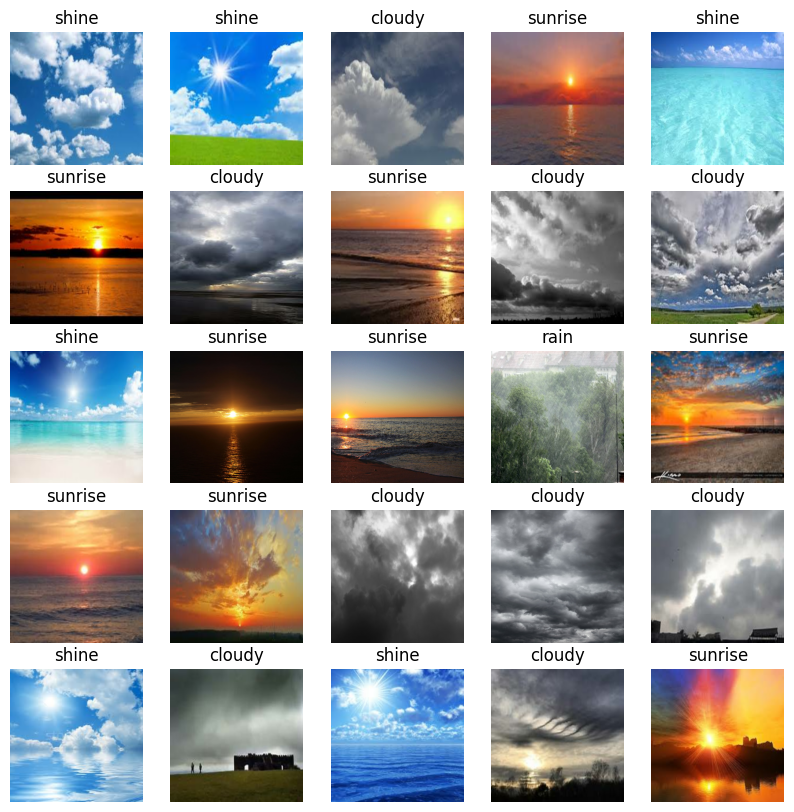

In [9]:
# Visualize the images from train_dataset 
import matplotlib.pyplot as plt
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for n in range(25):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]])
        plt.axis('off')

# Take a batch of images and labels from the training dataset
image_batch, label_batch = next(iter(train_dataset))

# Visualize the batch
show_batch(image_batch.numpy(), label_batch.numpy())

------------------------------------------------------------------

# 2. Simple classifier 

## 2.1. First classifier (`Model 1`)

In [29]:
# Import required libraries 
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [30]:
# Function to Plot Training and Validation Metrics 
def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

Visualizing training and validation 

### Build a Simple Model 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 158700)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │       634,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 634,804 (2.42 MB)

 Trainable params: 634,804 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
     19/Unknown 1s 32ms/step - accuracy: 0.3039 - loss: 37.8125

2024-04-05 19:51:12.953539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3373 - loss: 34.4945 - val_accuracy: 0.5689 - val_loss: 5.0401
Epoch 2/10
 2/25 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6172 - loss: 6.7845

2024-04-05 19:51:13.413025: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6709 - loss: 5.9024

2024-04-05 19:51:13.939860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6724 - loss: 5.8420 - val_accuracy: 0.6108 - val_loss: 4.3275
Epoch 3/10
 2/25 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6016 - loss: 5.6963

2024-04-05 19:51:14.202231: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


17/25 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6734 - loss: 4.8347

2024-04-05 19:51:14.702012: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6906 - loss: 4.4835 - val_accuracy: 0.6647 - val_loss: 5.0647
Epoch 4/10
 2/25 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.6562 - loss: 4.9524

2024-04-05 19:51:14.968725: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


18/25 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7135 - loss: 3.7388

2024-04-05 19:51:15.495580: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7202 - loss: 3.6028 - val_accuracy: 0.7186 - val_loss: 2.4236
Epoch 5/10
 2/25 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8359 - loss: 1.4037

2024-04-05 19:51:15.787299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7555 - loss: 3.5446

2024-04-05 19:51:16.346917: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7498 - loss: 3.9162 - val_accuracy: 0.7725 - val_loss: 2.9344
Epoch 6/10
 2/25 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.8906 - loss: 1.6145

2024-04-05 19:51:16.633184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7873 - loss: 3.2701

2024-04-05 19:51:17.233044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7756 - loss: 3.5725 - val_accuracy: 0.7365 - val_loss: 3.0418


2024-04-05 19:51:17.516941: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


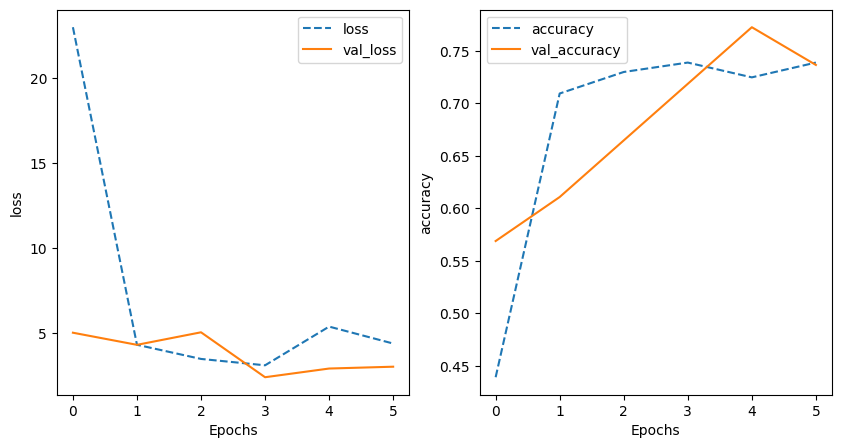

In [35]:
def build_simple_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS, CLASS_NAMES, lrate=0.001):
    model_simple = keras.Sequential([
        keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)), # Flatten the input image 
        keras.layers.Dense(len(CLASS_NAMES), activation='softmax') # Output layer with softmax activation 
    ])
    
    # Compile the model 
    model_simple.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    print(model_simple.summary())
    return model_simple

simple_model = build_simple_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS, CLASS_NAMES)

#Train the model with early stopping callback to prevent overfitting
history_simple_model = simple_model.fit(train_dataset, validation_data=validation_dataset, epochs=10,
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)])

# Utilize the existing training_plot function for visualization
training_plot(['loss', 'accuracy'], history_simple_model);

**Simple Model Summary**
- The model consists of two layers:
  - **Flatten Layer**: Converts the input image (230x230x3) into a 1D vector of shape (158,700)
  - **Dense Layer**: A fully connected layer with 4 neurons (one for each class), using the *softmax* activation function. This output layer provides probabilities for each class. 
- The model has a total of 634,804 trainable parameters. These parameters will be updated during training to optimize the model's performance on the classification task.

**Training Loss**
- The training loss drop dramatically during the first epoch, from a very high value (>20) to around 5. This indicates that the model is quickly learning from the data in the initial stages.
- After the first epoch, the loss continues to decrease but with more fluctiations, suggesting that the model is still learning but the rate of improvement is slowing down.

**Validation Loss**
- The validation loss starts off much lower than the training loss but fluctutes over the epochs.
- The instability in the validation loss, especially around epochs 2 and 4, suggests that the model may be starting to *overfit* to the training data, as the loss does not consistently decrease.  

**Training Accuracy**
- The training accuracy improves significantly from ~45% in the first epoch to around 75% by the fifth epoch.

**Validation Accuracy**
- The validation accuracy also improves over time, starting around 50% and reaching 70-75% by the fifth epoch. 
- The validation accuracy follows the training accuracy closely, indicating that the model is generalizing relatively well. However, the small drop in the final validation accuaracy suggests slight overfitting. 
  

In [36]:
# Evaluate the unseen data on the test dataset 
test_loss, test_accuracy = simple_model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy:.4f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7297 - loss: 3.4726
Test Accuracy: 0.7219


2024-04-05 19:51:17.930453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


The simple model (`Model 1`) achieved an accuracy of `72.19%` of the predictions made on the unseen test dataset are correct

In [42]:
# Check test accuarcy for each category 
def check_test_accuracy(model, dataset, class_names):
    # Ensure the dataset is not batched or is batched with batch size 1
    dataset = dataset.unbatch().batch(1)
    
    # Variables to store true labels and predictions
    all_labels = []
    all_predictions = []
    
    # Iterate over the dataset to collect all predictions and labels
    for images, labels in dataset:
        # Get model predictions
        preds = model.predict(images)
        all_predictions.extend(np.argmax(preds, axis=1))
        all_labels.extend(labels.numpy())
        
    all_labels = np.array(all_labels)
    all_predictions = np.array(all_predictions)
    
    # Calculate accuracy for each class
    accuracies = []
    for i, class_name in enumerate(class_names):
        indices = np.where(all_labels == i)[0]
        class_acc = np.mean(all_predictions[indices] == all_labels[indices])
        accuracies.append(class_acc)
        print(f"Accuracy for class {class_name}: {class_acc:.2f}")

    return accuracies

# Check the accuracy test for each category in CLASS_NAMES for "Simple Model"
class_accuracies_test = check_test_accuracy(simple_model, test_dataset, CLASS_NAMES)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━

2024-04-05 19:58:37.401165: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## 2.2 A more complex classifier (`Model 2`)

In [ ]:
# Import libraries 
import keras_tunner as kt 
from tensorflow.keras import optimizers, losses 
import numpy as np 

### Build the Complex Model 

**Number of Hidden Layers (num_hidden)**<p>
 - 1 to 3 hidden layers <p>
 - *Justification*: 1 to 3 layers are used to let the model detect patterns without being too complex. More layers can learn complicated patterns, but too many could memorize the data instead of learning from it (overfitting).<p>

**Sizes of Hidden Layers (hidden_size)**<p>
- From 32 to 512 neurons, in steps of 32 <p>
- *Justification*: The layers have between 32 to 512 neurons, adjustable by 32 each time. This range supports to find the spot between a model that's too simple or too complex.<p>

**Dropout Rate (dropout)**<p>
- 0.0 to 0.9 <p>
- *Justification*: Set between 0% to 90%, dropout randomly turns off some neurons during training. This helps the model be robust and not too dependent on any one piece of data.<p>

**Learning Rate (lrate)**<p>
-  1e-4 to 1e-1 <p>
- *Justification*: It varies from 1e-4 to 1e-1. This range is broad enough to find a learning rate that's not too slow (taking forever to learn) or too fast (missing the best solution).<p>

In [38]:
def build_complex_model(hp):
    # Adapting the input shape and CLASS_NAMES based on the current task's dataset
    model_complex = keras.Sequential()
    model_complex.add(keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)))
    # Tuning the number of hidden layers and sizes, with dropout
    for i in range(hp.Int('num_hidden', 1, 3)):
        # The number of neurons in each layer to vary between 32 and 512, increasing in step of 32
        model_complex.add(keras.layers.Dense(hp.Int(f'hidden_size_{i}', 32, 512, step=32), activation='relu')) # 'relu'introduces non-linearity and helps the model learn complex patterns.
        model_complex.add(keras.layers.Dropout(hp.Float(f'dropout_{i}', 0.0, 0.9))) # Tuning dropout rate 
    model_complex.add(keras.layers.Dense(len(CLASS_NAMES), activation='softmax')) # 'softmax' ensures that the output is a probability distribution across the classes.

    # Compile the model 
    model_complex.compile(
        optimizer=optimizers.Adam(learning_rate=hp.Float('lrate', 1e-4, 1e-1, sampling='log')),
        loss=losses.SparseCategoricalCrossentropy(), # 'SparseCategoricalCrossentropy': for multi-class classification with integer labels. 
        metrics=['accuracy'])
    
    print(model_complex.summary())
    return model_complex


### Hyperparameter Tuning with Keras Tuner

Trial 10 Complete [00h 00m 53s]
val_accuracy: 0.802395224571228

Best val_accuracy So Far: 0.8143712282180786
Total elapsed time: 00h 05m 06s


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 158700)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 160)            │    25,392,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,392,804 (96.87 MB)

 Trainable params: 25,392,804 (96.87 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
     25/Unknown 2s 60ms/step - accuracy: 0.4376 - loss: 24.6583

2024-04-05 19:56:41.014774: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.4421 - loss: 24.1548 - val_accuracy: 0.7006 - val_loss: 1.9926
Epoch 2/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.7188 - loss: 1.2042

2024-04-05 19:56:41.365979: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7049 - loss: 1.7610

2024-04-05 19:56:42.879025: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.7057 - loss: 1.7524 - val_accuracy: 0.6886 - val_loss: 1.2811
Epoch 3/10
 2/25 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5703 - loss: 1.2063 

2024-04-05 19:56:43.195318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6972 - loss: 1.3198

2024-04-05 19:56:44.810120: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.6982 - loss: 1.3210 - val_accuracy: 0.7066 - val_loss: 1.4162
Epoch 4/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.5938 - loss: 0.9969

2024-04-05 19:56:45.111653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7376 - loss: 1.1032

2024-04-05 19:56:46.766811: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.7388 - loss: 1.0985 - val_accuracy: 0.6886 - val_loss: 1.1699
Epoch 5/10
 2/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.6797 - loss: 1.0621 

2024-04-05 19:56:47.091544: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7389 - loss: 0.9835

2024-04-05 19:56:48.646365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.7398 - loss: 0.9867 - val_accuracy: 0.8024 - val_loss: 0.7353
Epoch 6/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 1.0000 - loss: 0.0252

2024-04-05 19:56:48.964506: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8662 - loss: 0.5019

2024-04-05 19:56:50.521630: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.8639 - loss: 0.5085 - val_accuracy: 0.7665 - val_loss: 0.7806
Epoch 7/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9688 - loss: 0.0961

2024-04-05 19:56:50.840811: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8655 - loss: 0.4009

2024-04-05 19:56:52.386065: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.8645 - loss: 0.4043 - val_accuracy: 0.7844 - val_loss: 0.6872
Epoch 8/10
 2/25 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9453 - loss: 0.2085 

2024-04-05 19:56:52.708447: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8172 - loss: 0.6081

2024-04-05 19:56:54.239539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8156 - loss: 0.6198 - val_accuracy: 0.8084 - val_loss: 0.7550
Epoch 9/10
 2/25 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9219 - loss: 0.2788 

2024-04-05 19:56:54.544346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8033 - loss: 0.6138

2024-04-05 19:56:56.186534: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.8040 - loss: 0.6118 - val_accuracy: 0.7305 - val_loss: 1.0195


2024-04-05 19:56:56.493887: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


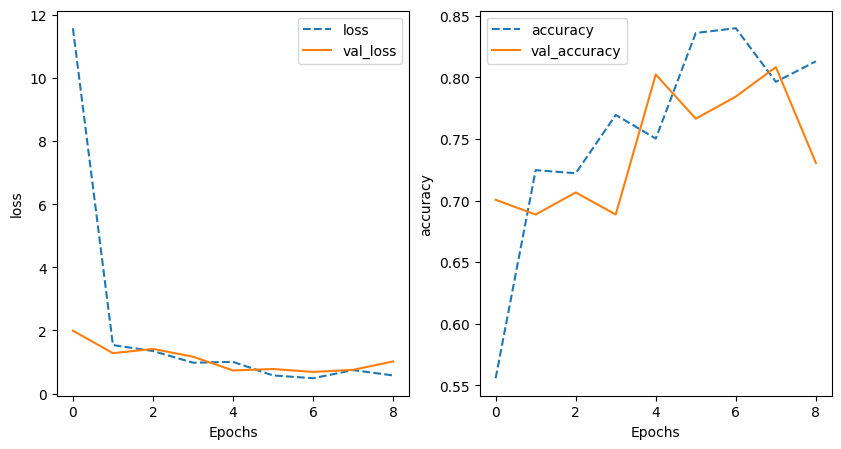

In [39]:
# Initialize the BayesianOptimization tuner
tuner = kt.BayesianOptimization(
    build_complex_model,
    objective='val_accuracy',
    max_trials=10,
    num_initial_points=2,
    overwrite=True
)


# Conduct the hyperparameter search using the training and validation datasets
tuner.search(
    train_dataset, 
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[keras.callbacks.EarlyStopping(patience=3)]
)

# Retrieve the best hyperparameters 
best_hp_complex_model  = tuner.get_best_hyperparameters(num_trials=1)[0]
# Rebuild the best model
best_model_complex = build_complex_model(best_hp_complex_model)

# Train the best model
history_complex_model = best_model_complex.fit(
    train_dataset, validation_data=validation_dataset, epochs=10,
    callbacks=[keras.callbacks.EarlyStopping(patience=2)]
)

# Utilize the existing training_plot function for visualization
training_plot(['loss', 'accuracy'], history_complex_model);

- The high number of parameters (`25,392,804`) shows that the model is complex, likely able to capture intricate patterns in the data. However, such complexity may require regularization (dropout) to avoid overfitting.
- The dense layer with `160 neurons` strikes a balance between capacity and overfitting. Keras Tuner identified this size as optimal during the hyperparameter search.

**Training Loss** 
- The training loss decreases significantly from approximately `12 to 1` over the first few epoches indicating that the model is learning quickly and effectively.
- After epoch 3, the training loss plateaus around `0.5`, showing that the model reaches a stable state after a few epochs.

**Validation Loss** 
- The validation loss starts around 2 and fluctuates slightly over the epochs but remains relatively stable after epoch 4.
- The small gap between training and validationloss => the model is not significantly overfitting, which is a good sign. 

**Training Accuracy**
- The training accuracy improves rapidly, reaching over 80% after a few epochs => The model learns the training data effectively.

**Validation Accuracy**
- The validation accuracy is initially lower than the training accuracy but increases steadily, peaking around `81.43%` after a few epochs. However, it fluctuates slightly, indicating that there could be small amounts of overfitting, but nothing severe.


In [40]:
# Evaluate the unseen data on the test dataset 
test_loss, test_accuracy = best_model_complex.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy:.4f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7231 - loss: 0.9419
Test Accuracy: 0.7515


2024-04-05 19:57:26.482874: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


The complex model (`Model 2`) achieved an accuracy of 75.15% on the test dataset.

In [43]:
# Check the accuracy test for each category in CLASS_NAMES for "Complex Model"
class_accuracies_test = check_test_accuracy(best_model_complex, test_dataset, CLASS_NAMES)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

2024-04-05 19:59:28.302902: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


The model performs well on `sunrise` and `rain` classes but struggles with `cloudy` and `shine`. Improving the model’s ability to distinguish between these classes through augmentation, better feature extraction, or rebalancing the dataset could significantly enhance its performance.

## 2.3 Error analysis 

In [44]:
# Assuming 'simple_model' is simple model from Task 2.1 and 'best_model_complex' is complex model from Task 2.2
test_loss_model_1, test_accuracy_model_1 = simple_model.evaluate(test_dataset)
test_loss_model_2, test_accuracy_model_2 = best_model_complex.evaluate(test_dataset)

print(f"Model 1 Test Accuracy: {test_accuracy_model_1:.4f}")
print(f"Model 2 Test Accuracy: {test_accuracy_model_2:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7297 - loss: 3.4726
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7231 - loss: 0.9419
Model 1 Test Accuracy: 0.7219
Model 2 Test Accuracy: 0.7515


2024-04-05 19:59:36.427566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-05 19:59:36.606226: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


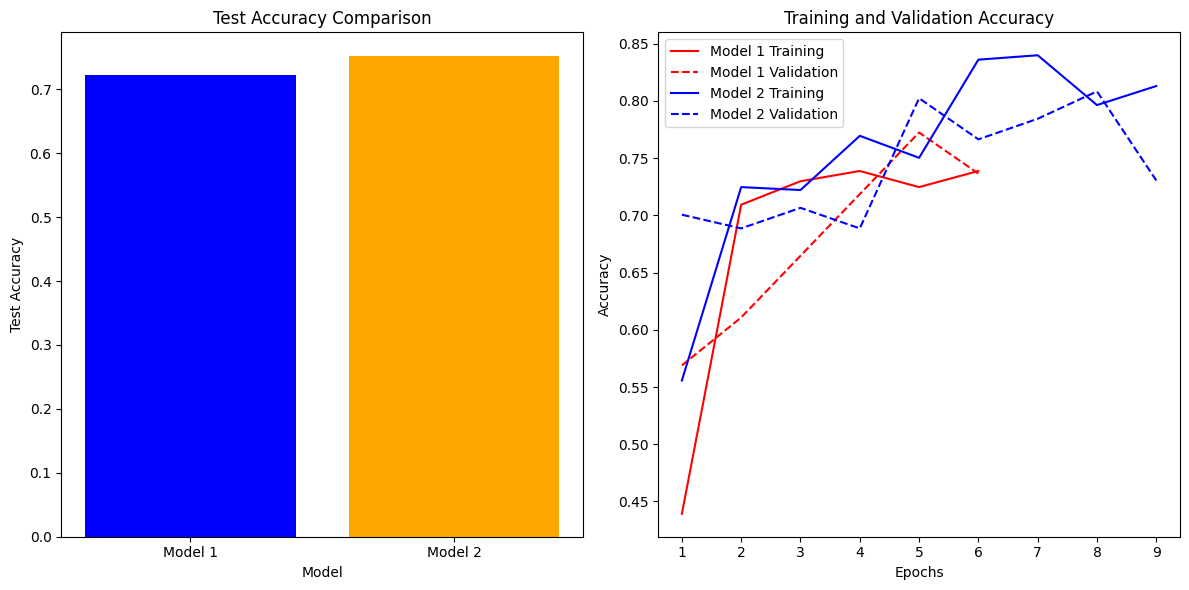

In [45]:
import matplotlib.pyplot as plt

# Assuming 'history_simple_model' and 'history_complex_model' are the history objects from fitting Model 1 and Model 2
epochs_model_1 = range(1, len(history_simple_model.history['accuracy']) + 1)
epochs_model_2 = range(1, len(history_complex_model.history['accuracy']) + 1)

# Accuracy comparison plot
plt.figure(figsize=(12, 6))

# Subplot for accuracy comparison
plt.subplot(1, 2, 1)
plt.bar(['Model 1', 'Model 2'], [test_accuracy_model_1, test_accuracy_model_2], color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison')

# Subplot for overfitting comparison
plt.subplot(1, 2, 2)
plt.plot(epochs_model_1, history_simple_model.history['accuracy'], 'r-', label='Model 1 Training')
plt.plot(epochs_model_1, history_simple_model.history['val_accuracy'], 'r--', label='Model 1 Validation')
plt.plot(epochs_model_2, history_complex_model.history['accuracy'], 'b-', label='Model 2 Training')
plt.plot(epochs_model_2, history_complex_model.history['val_accuracy'], 'b--', label='Model 2 Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Evaluate best-performing system from task 2.2 against the system of task 2.1**<p>
1. *Which system had a better accuarcy on the test data?* <p>
Model 2 has a better accuracy on the test data, with an accuracy of `75.15%`, compared to Model 's test accuarcy of `72.19%`. The more complex architecture allowed Model 2 to better capture patterns and generalize to unseen data, resulting in superior test performance. <p>
2. *Which system had a lower degree of overfitting?* <p>
Model 2 demonstrates a lower degree of overfitting, as evidenced by the smaller gap between training and validation accuracies (`5%`compared to `8% for Model 1`). This indicates that Model 2 is more capable of generalizing to new data, and the use of dropout likely helped mitigate overfitting by promoting better regularization.

----

# 3. A more complex classifier (`Model 3`)

## 3.1 Using ConvNets 

In [51]:
from tensorflow.keras import layers

# Build the model using ConvNets
img_size = (230, 230)  # Image size
num_classes = len(CLASS_NAMES)
def build_ConvNets (hp):
    model_ConvNets = keras.Sequential()
     # Initial Convolutional Block with Tunable Parameters
    model_ConvNets.add(layers.Conv2D(filters=hp.Int('initial_filters', 32, 512, step=32),
                            kernel_size=hp.Choice('initial_kernel_size', [3, 5]),
                            activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
                            padding='same'))
    model_ConvNets.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    # Additional Convolutional Blocks
    # Add 1 to 3 additional Conv+Pooling blocks with tunable hyperparameters
    for i in range(hp.Int('num_conv_blocks', 1, 3)):
        model_ConvNets.add(layers.Conv2D(filters=hp.Int(f'filters_{i}', 32, 512, step=32),
                                kernel_size=hp.Choice(f'kernel_size_{i}', [3, 5]),
                                activation='relu', padding='same'))
        model_ConvNets.add(layers.MaxPooling2D(pool_size=hp.Choice(f'pool_size_{i}', [2, 3])))
    
    # Flattening layer
    model_ConvNets.add(layers.Flatten())
    
    # Dense Layers 
    # Add 1 to 3 additional Conv+Pooling blocks with tunable hyperparameters
    for i in range(hp.Int('num_dense_blocks', 1, 3)):
        model_ConvNets.add(layers.Dense(units=hp.Int(f'dense_units_{i}', min_value=32, max_value=512, step=32),
                               activation='relu'))
        model_ConvNets.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.9, step=0.1)))
    
    # Output Layer
    model_ConvNets.add(layers.Dense(len(CLASS_NAMES), activation='softmax'))

    # Compile the model
    model_ConvNets.compile(optimizer=optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='sparse_categorical_crossentropy', # for integers
                  metrics=['accuracy'])
    
    print(model_ConvNets.summary())
    return model_ConvNets

Trial 10 Complete [00h 00m 20s]
val_accuracy: 0.7844311594963074

Best val_accuracy So Far: 0.8203592896461487
Total elapsed time: 00h 06m 08s


/Users/viviannguyen/anaconda3/envs/python310/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 230, 230, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 115, 115, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 115, 115, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 57, 57, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 103968)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │     3,327,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,337,284 (12.73 MB)

 Trainable params: 3,337,284 (12.73 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
     25/Unknown 8s 296ms/step - accuracy: 0.4879 - loss: 1.2393

2024-04-05 20:25:33.682660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - accuracy: 0.4920 - loss: 1.2285 - val_accuracy: 0.7066 - val_loss: 0.5998
Epoch 2/10


2024-04-05 20:25:34.260098: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.7977 - loss: 0.5929

2024-04-05 20:25:41.740434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 320ms/step - accuracy: 0.7977 - loss: 0.5909 - val_accuracy: 0.8204 - val_loss: 0.4317
Epoch 3/10


2024-04-05 20:25:42.306003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8435 - loss: 0.4550

2024-04-05 20:25:49.394592: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 303ms/step - accuracy: 0.8430 - loss: 0.4542 - val_accuracy: 0.8323 - val_loss: 0.3781
Epoch 4/10


2024-04-05 20:25:49.946975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.8708 - loss: 0.3834

2024-04-05 20:25:57.159490: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 307ms/step - accuracy: 0.8703 - loss: 0.3827 - val_accuracy: 0.8263 - val_loss: 0.3591
Epoch 5/10


2024-04-05 20:25:57.673254: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.8753 - loss: 0.3420

2024-04-05 20:26:04.984453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 315ms/step - accuracy: 0.8753 - loss: 0.3411 - val_accuracy: 0.8263 - val_loss: 0.3450
Epoch 6/10


2024-04-05 20:26:05.610725: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.8929 - loss: 0.3108

2024-04-05 20:26:13.347279: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 329ms/step - accuracy: 0.8926 - loss: 0.3099 - val_accuracy: 0.8443 - val_loss: 0.3425
Epoch 7/10


2024-04-05 20:26:13.916067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9074 - loss: 0.2896

2024-04-05 20:26:21.111619: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 306ms/step - accuracy: 0.9072 - loss: 0.2886 - val_accuracy: 0.8563 - val_loss: 0.3379
Epoch 8/10


2024-04-05 20:26:21.642039: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.9058 - loss: 0.2694

2024-04-05 20:26:28.843736: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 307ms/step - accuracy: 0.9058 - loss: 0.2684 - val_accuracy: 0.8443 - val_loss: 0.3383
Epoch 9/10


2024-04-05 20:26:29.365901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9115 - loss: 0.2553

2024-04-05 20:26:36.637815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 310ms/step - accuracy: 0.9115 - loss: 0.2543 - val_accuracy: 0.8503 - val_loss: 0.3358
Epoch 10/10


2024-04-05 20:26:37.184390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.9145 - loss: 0.2431

2024-04-05 20:26:44.645487: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 311ms/step - accuracy: 0.9147 - loss: 0.2421 - val_accuracy: 0.8503 - val_loss: 0.3256


2024-04-05 20:26:45.171915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


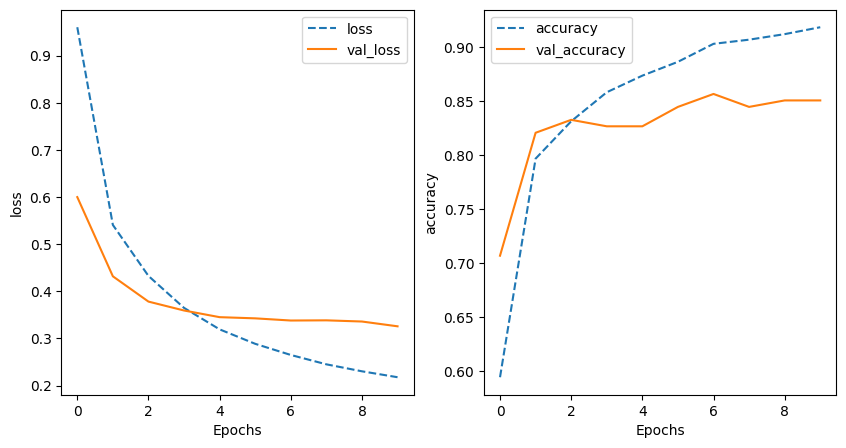

In [52]:
# Initialize the BayesianOptimization tuner
tuner = kt.BayesianOptimization(
    build_complex_model,
    objective='val_accuracy',
    max_trials=10,
    num_initial_points=2,
    overwrite=True,
)

# Run the hyperparameter search
tuner.search(
    train_dataset, 
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[keras.callbacks.EarlyStopping(patience=3)]
)

# Retrieve the best hyperparameters 
best_hp_ConvNets  = tuner.get_best_hyperparameters(num_trials=1)[0]
# Rebuild the best model
best_ConvNets = build_ConvNets(best_hp_complex_model)

# Train the best model
history_ConvNets = best_ConvNets.fit(
    train_dataset, validation_data=validation_dataset, epochs=10,
    callbacks=[keras.callbacks.EarlyStopping(patience=2)]
)

# Utilize the existing training_plot function for visualization
training_plot(['loss', 'accuracy'], history_ConvNets);

In [53]:
# Evaluate the unseen data on the test dataset 
test_loss, test_accuracy = best_ConvNets.evaluate(test_dataset)  
print(f"Test accuracy: {test_accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8967 - loss: 0.2574
Test accuracy: 0.8876


2024-04-05 20:26:49.348424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


The ConvNets model achieved an accuracy of `88.76%` on the test dataset.

In [54]:
# Check the accuracy test for each category in CLASS_NAMES for "ConvNets Model"
class_accuracies_test = check_test_accuracy(best_ConvNets, test_dataset, CLASS_NAMES)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

2024-04-05 20:26:57.150318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


**Strong Overall Performance**: <p>
With a test accuracy of 88.76%, this ConvNets model performs exceptionally well, particularly for classes like `cloudy (96%)` and `sunrise (96%)`. The use of convolutional layers clearly helps capture important spatial features from the images.

**Regularization with Dropout**:<p>
 The dropout layer helps prevent overfitting, and the closeness of the training and validation accuracy indicates that the model generalizes well to unseen data.

**Class-Specific Challenges**:<p>
`Shine (69%)` could benefit from further improvement. Techniques like data augmentation (e.g., brightness adjustments or rotations) or class weighting could help the model learn more about this class.
`Rain (88%)` might benefit from enhanced feature extraction, possibly by adding more convolutional layers or using different kernel sizes to capture finer details.

## 3.2 Using pre-trained models 

In [55]:
# Resize images to the original size (224,224)
def resize_images(dataset, new_size=(224, 224)):
    def resize_image(image, label):
        # Resize the image
        image = tf.image.resize(image, new_size)
        return image, label

    # Apply the resize_image function to each item in the dataset
    return dataset.map(resize_image)

# Apply the resize function to train, validation, and test datasets
train_dataset_rs = resize_images(train_dataset)
validation_dataset_rs = resize_images(validation_dataset)
test_dataset_rs = resize_images(test_dataset)

In [56]:
from tensorflow.keras.optimizers import Adam

IMG_HEIGHT_1 = 224
IMG_WIDTH_1 = 224
IMG_CHANNELS =3
# Build model using MobileNet
def build_MobileNet():
    # Load MobileNet with pre-trained ImageNet weights, excluding the top layer
    base_model = tf.keras.applications.MobileNet(
        weights="imagenet",
        include_top=False,
        input_shape=(IMG_HEIGHT_1, IMG_WIDTH_1, IMG_CHANNELS),
        pooling="avg"  # Use global average pooling
    )
    
    # Freeze the pre-trained model weights during training
    base_model.trainable = False

    # Create a new sequential model and add the pre-trained base model
    model_MobileNet = tf.keras.Sequential([base_model])
    model_MobileNet.add(tf.keras.layers.Dense(units=128, activation='relu'))
    model_MobileNet.add(tf.keras.layers.Dropout(rate=0.5))

    # Add the output classification layer with a softmax activation
    model_MobileNet.add(tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax'))

    # Compile the model
    model_MobileNet.compile(
        optimizer=Adam(),
        loss='sparse_categorical_crossentropy',  # for integer 
        metrics=['accuracy']
    )

    return model_MobileNet
model_MobileNet = build_MobileNet()
model_MobileNet.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ ?                      │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

Learning rate schedule: 1e-05 to 5e-05 to 1e-05


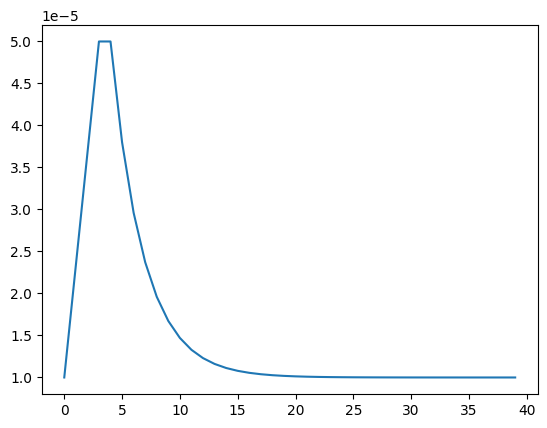

In [57]:
EPOCHS = 40

# Learning rate schedule
LR_START = 0.00001
LR_MAX = 0.00005
LR_MIN = 0.00001
LR_RAMPUP_EPOCHS = 3
LR_SUSTAIN_EPOCHS = 1
LR_EXP_DECAY = .7

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

rng = [i for i in range(EPOCHS)]
y = [lrfn(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

**Learning Rate Schedule Used**:
- Initial Learning Rate: 1e-5
- Increased to 5e-5
- Then, decays back to 1e-5 over the epochs.
  
**Reasonable Schedule**:
  - The initial low learning rate ensures that the model starts learning gradually without making too large jumps, which could destabilize training.
  - Increasing the learning rate helps the model escape local minima in the early epochs.
  - Finally, reducing the learning rate again ensures fine-tuning towards the end, allowing the model to converge optimally.


Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/40
     25/Unknown 6s 193ms/step - accuracy: 0.2113 - loss: 2.2414

2024-04-05 20:27:10.675102: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - accuracy: 0.2125 - loss: 2.2341 - val_accuracy: 0.2156 - val_loss: 1.4651 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 2.3333333333333336e-05.
Epoch 2/40


2024-04-05 20:27:12.214961: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.2855 - loss: 1.9448

2024-04-05 20:27:17.138096: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - accuracy: 0.2860 - loss: 1.9388 - val_accuracy: 0.3713 - val_loss: 1.1980 - learning_rate: 2.3333e-05

Epoch 3: LearningRateScheduler setting learning rate to 3.666666666666667e-05.
Epoch 3/40


2024-04-05 20:27:18.239363: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.3363 - loss: 1.6706

2024-04-05 20:27:23.065764: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.3368 - loss: 1.6650 - val_accuracy: 0.5150 - val_loss: 0.9882 - learning_rate: 3.6667e-05

Epoch 4: LearningRateScheduler setting learning rate to 5e-05.
Epoch 4/40


2024-04-05 20:27:24.164497: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.3815 - loss: 1.4183

2024-04-05 20:27:28.941752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.3831 - loss: 1.4122 - val_accuracy: 0.6108 - val_loss: 0.8268 - learning_rate: 5.0000e-05

Epoch 5: LearningRateScheduler setting learning rate to 5e-05.
Epoch 5/40


2024-04-05 20:27:30.038523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.5029 - loss: 1.1738

2024-04-05 20:27:34.782072: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.5036 - loss: 1.1704 - val_accuracy: 0.6766 - val_loss: 0.7087 - learning_rate: 5.0000e-05

Epoch 6: LearningRateScheduler setting learning rate to 3.8e-05.
Epoch 6/40


2024-04-05 20:27:35.868809: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.5491 - loss: 1.0682

2024-04-05 20:27:40.787621: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.5503 - loss: 1.0641 - val_accuracy: 0.7246 - val_loss: 0.6415 - learning_rate: 3.8000e-05

Epoch 7: LearningRateScheduler setting learning rate to 2.96e-05.
Epoch 7/40


2024-04-05 20:27:41.899109: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.5604 - loss: 1.0191

2024-04-05 20:27:46.622409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - accuracy: 0.5623 - loss: 1.0145 - val_accuracy: 0.7665 - val_loss: 0.5991 - learning_rate: 2.9600e-05

Epoch 8: LearningRateScheduler setting learning rate to 2.3719999999999997e-05.
Epoch 8/40


2024-04-05 20:27:47.715472: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.6825 - loss: 0.8338

2024-04-05 20:27:52.439222: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.6828 - loss: 0.8317 - val_accuracy: 0.7904 - val_loss: 0.5686 - learning_rate: 2.3720e-05

Epoch 9: LearningRateScheduler setting learning rate to 1.9603999999999997e-05.
Epoch 9/40


2024-04-05 20:27:53.581174: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.6673 - loss: 0.8453

2024-04-05 20:27:58.319547: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.6679 - loss: 0.8426 - val_accuracy: 0.8084 - val_loss: 0.5463 - learning_rate: 1.9604e-05

Epoch 10: LearningRateScheduler setting learning rate to 1.67228e-05.
Epoch 10/40


2024-04-05 20:27:59.415133: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.6848 - loss: 0.7947

2024-04-05 20:28:04.368516: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - accuracy: 0.6850 - loss: 0.7925 - val_accuracy: 0.8144 - val_loss: 0.5290 - learning_rate: 1.6723e-05

Epoch 11: LearningRateScheduler setting learning rate to 1.470596e-05.
Epoch 11/40


2024-04-05 20:28:05.455545: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.7216 - loss: 0.7601

2024-04-05 20:28:10.309169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - accuracy: 0.7215 - loss: 0.7583 - val_accuracy: 0.8144 - val_loss: 0.5141 - learning_rate: 1.4706e-05

Epoch 12: LearningRateScheduler setting learning rate to 1.3294171999999999e-05.
Epoch 12/40


2024-04-05 20:28:11.418086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.6962 - loss: 0.7754

2024-04-05 20:28:16.181933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.6965 - loss: 0.7731 - val_accuracy: 0.8144 - val_loss: 0.5016 - learning_rate: 1.3294e-05

Epoch 13: LearningRateScheduler setting learning rate to 1.23059204e-05.
Epoch 13/40


2024-04-05 20:28:17.277294: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.7159 - loss: 0.7124

2024-04-05 20:28:22.013330: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.7163 - loss: 0.7106 - val_accuracy: 0.8204 - val_loss: 0.4889 - learning_rate: 1.2306e-05

Epoch 14: LearningRateScheduler setting learning rate to 1.161414428e-05.
Epoch 14/40


2024-04-05 20:28:23.113018: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.7584 - loss: 0.6986

2024-04-05 20:28:27.928016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - accuracy: 0.7582 - loss: 0.6971 - val_accuracy: 0.8204 - val_loss: 0.4786 - learning_rate: 1.1614e-05

Epoch 15: LearningRateScheduler setting learning rate to 1.1129900996e-05.
Epoch 15/40


2024-04-05 20:28:29.017730: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.7127 - loss: 0.7300

2024-04-05 20:28:33.874829: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.7128 - loss: 0.7278 - val_accuracy: 0.8204 - val_loss: 0.4690 - learning_rate: 1.1130e-05

Epoch 16: LearningRateScheduler setting learning rate to 1.07909306972e-05.
Epoch 16/40


2024-04-05 20:28:35.083749: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.7356 - loss: 0.7019

2024-04-05 20:28:40.182078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.7359 - loss: 0.7000 - val_accuracy: 0.8323 - val_loss: 0.4604 - learning_rate: 1.0791e-05

Epoch 17: LearningRateScheduler setting learning rate to 1.055365148804e-05.
Epoch 17/40


2024-04-05 20:28:41.279332: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.7340 - loss: 0.6883

2024-04-05 20:28:46.169039: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.7341 - loss: 0.6867 - val_accuracy: 0.8383 - val_loss: 0.4514 - learning_rate: 1.0554e-05

Epoch 18: LearningRateScheduler setting learning rate to 1.0387556041628e-05.
Epoch 18/40


2024-04-05 20:28:47.279692: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.7361 - loss: 0.6724

2024-04-05 20:28:52.171532: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.7365 - loss: 0.6707 - val_accuracy: 0.8383 - val_loss: 0.4431 - learning_rate: 1.0388e-05

Epoch 19: LearningRateScheduler setting learning rate to 1.0271289229139601e-05.
Epoch 19/40


2024-04-05 20:28:53.280900: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.7775 - loss: 0.6162

2024-04-05 20:28:58.129818: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - accuracy: 0.7777 - loss: 0.6148 - val_accuracy: 0.8503 - val_loss: 0.4350 - learning_rate: 1.0271e-05

Epoch 20: LearningRateScheduler setting learning rate to 1.018990246039772e-05.
Epoch 20/40


2024-04-05 20:28:59.221829: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.7701 - loss: 0.6459

2024-04-05 20:29:04.070528: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.7705 - loss: 0.6441 - val_accuracy: 0.8563 - val_loss: 0.4273 - learning_rate: 1.0190e-05

Epoch 21: LearningRateScheduler setting learning rate to 1.0132931722278405e-05.
Epoch 21/40


2024-04-05 20:29:05.191248: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.7908 - loss: 0.6099

2024-04-05 20:29:10.110587: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.7910 - loss: 0.6083 - val_accuracy: 0.8563 - val_loss: 0.4202 - learning_rate: 1.0133e-05

Epoch 22: LearningRateScheduler setting learning rate to 1.0093052205594883e-05.
Epoch 22/40


2024-04-05 20:29:11.225138: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.7639 - loss: 0.6509

2024-04-05 20:29:16.082008: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.7643 - loss: 0.6490 - val_accuracy: 0.8563 - val_loss: 0.4136 - learning_rate: 1.0093e-05

Epoch 23: LearningRateScheduler setting learning rate to 1.0065136543916418e-05.
Epoch 23/40


2024-04-05 20:29:17.186184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.7742 - loss: 0.5934

2024-04-05 20:29:21.887351: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - accuracy: 0.7744 - loss: 0.5921 - val_accuracy: 0.8683 - val_loss: 0.4070 - learning_rate: 1.0065e-05

Epoch 24: LearningRateScheduler setting learning rate to 1.0045595580741493e-05.
Epoch 24/40


2024-04-05 20:29:22.986379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.7842 - loss: 0.5857

2024-04-05 20:29:28.118877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - accuracy: 0.7849 - loss: 0.5834 - val_accuracy: 0.8683 - val_loss: 0.4010 - learning_rate: 1.0046e-05

Epoch 25: LearningRateScheduler setting learning rate to 1.0031916906519046e-05.
Epoch 25/40


2024-04-05 20:29:29.246474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.7693 - loss: 0.5935

2024-04-05 20:29:34.313282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step - accuracy: 0.7702 - loss: 0.5912 - val_accuracy: 0.8683 - val_loss: 0.3943 - learning_rate: 1.0032e-05

Epoch 26: LearningRateScheduler setting learning rate to 1.0022341834563332e-05.
Epoch 26/40


2024-04-05 20:29:35.453736: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.7701 - loss: 0.5896

2024-04-05 20:29:40.182967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.7709 - loss: 0.5873 - val_accuracy: 0.8802 - val_loss: 0.3882 - learning_rate: 1.0022e-05

Epoch 27: LearningRateScheduler setting learning rate to 1.0015639284194332e-05.
Epoch 27/40


2024-04-05 20:29:41.273261: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.7729 - loss: 0.5745

2024-04-05 20:29:46.010391: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.7735 - loss: 0.5733 - val_accuracy: 0.8802 - val_loss: 0.3820 - learning_rate: 1.0016e-05

Epoch 28: LearningRateScheduler setting learning rate to 1.0010947498936033e-05.
Epoch 28/40


2024-04-05 20:29:47.092343: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.7906 - loss: 0.5569

2024-04-05 20:29:52.063255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.7913 - loss: 0.5548 - val_accuracy: 0.8862 - val_loss: 0.3764 - learning_rate: 1.0011e-05

Epoch 29: LearningRateScheduler setting learning rate to 1.0007663249255223e-05.
Epoch 29/40


2024-04-05 20:29:53.176294: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.8011 - loss: 0.5731

2024-04-05 20:29:58.114088: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - accuracy: 0.8013 - loss: 0.5710 - val_accuracy: 0.8922 - val_loss: 0.3713 - learning_rate: 1.0008e-05

Epoch 30: LearningRateScheduler setting learning rate to 1.0005364274478657e-05.
Epoch 30/40


2024-04-05 20:29:59.320413: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.8082 - loss: 0.5401

2024-04-05 20:30:04.130137: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.8083 - loss: 0.5385 - val_accuracy: 0.8922 - val_loss: 0.3660 - learning_rate: 1.0005e-05

Epoch 31: LearningRateScheduler setting learning rate to 1.000375499213506e-05.
Epoch 31/40


2024-04-05 20:30:05.225017: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.7987 - loss: 0.5244

2024-04-05 20:30:10.038986: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.7998 - loss: 0.5222 - val_accuracy: 0.8922 - val_loss: 0.3604 - learning_rate: 1.0004e-05

Epoch 32: LearningRateScheduler setting learning rate to 1.0002628494494543e-05.
Epoch 32/40


2024-04-05 20:30:11.195930: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.8070 - loss: 0.5082

2024-04-05 20:30:16.193747: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - accuracy: 0.8075 - loss: 0.5068 - val_accuracy: 0.8922 - val_loss: 0.3549 - learning_rate: 1.0003e-05

Epoch 33: LearningRateScheduler setting learning rate to 1.000183994614618e-05.
Epoch 33/40


2024-04-05 20:30:17.306450: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.7897 - loss: 0.5691

2024-04-05 20:30:22.174431: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.7899 - loss: 0.5669 - val_accuracy: 0.8982 - val_loss: 0.3501 - learning_rate: 1.0002e-05

Epoch 34: LearningRateScheduler setting learning rate to 1.0001287962302327e-05.
Epoch 34/40


2024-04-05 20:30:23.326425: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.8303 - loss: 0.5078

2024-04-05 20:30:28.463074: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 0.8306 - loss: 0.5059 - val_accuracy: 0.9042 - val_loss: 0.3454 - learning_rate: 1.0001e-05

Epoch 35: LearningRateScheduler setting learning rate to 1.0000901573611629e-05.
Epoch 35/40


2024-04-05 20:30:29.627201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.7953 - loss: 0.5168

2024-04-05 20:30:34.676928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - accuracy: 0.7962 - loss: 0.5152 - val_accuracy: 0.9102 - val_loss: 0.3408 - learning_rate: 1.0001e-05

Epoch 36: LearningRateScheduler setting learning rate to 1.000063110152814e-05.
Epoch 36/40


2024-04-05 20:30:35.802790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.8448 - loss: 0.4731

2024-04-05 20:30:40.858894: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.8449 - loss: 0.4719 - val_accuracy: 0.9162 - val_loss: 0.3362 - learning_rate: 1.0001e-05

Epoch 37: LearningRateScheduler setting learning rate to 1.0000441771069698e-05.
Epoch 37/40


2024-04-05 20:30:42.141879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8157 - loss: 0.5064

2024-04-05 20:30:47.356563: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.8165 - loss: 0.5045 - val_accuracy: 0.9162 - val_loss: 0.3314 - learning_rate: 1.0000e-05

Epoch 38: LearningRateScheduler setting learning rate to 1.0000309239748789e-05.
Epoch 38/40


2024-04-05 20:30:48.473074: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.8236 - loss: 0.4971

2024-04-05 20:30:53.333387: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.8240 - loss: 0.4951 - val_accuracy: 0.9162 - val_loss: 0.3272 - learning_rate: 1.0000e-05

Epoch 39: LearningRateScheduler setting learning rate to 1.0000216467824152e-05.
Epoch 39/40


2024-04-05 20:30:54.519015: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.8339 - loss: 0.4857

2024-04-05 20:30:59.461575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.8345 - loss: 0.4840 - val_accuracy: 0.9222 - val_loss: 0.3226 - learning_rate: 1.0000e-05

Epoch 40: LearningRateScheduler setting learning rate to 1.0000151527476907e-05.
Epoch 40/40


2024-04-05 20:31:00.599906: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.8406 - loss: 0.4756

2024-04-05 20:31:05.810409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.8410 - loss: 0.4738 - val_accuracy: 0.9222 - val_loss: 0.3185 - learning_rate: 1.0000e-05


2024-04-05 20:31:07.020372: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


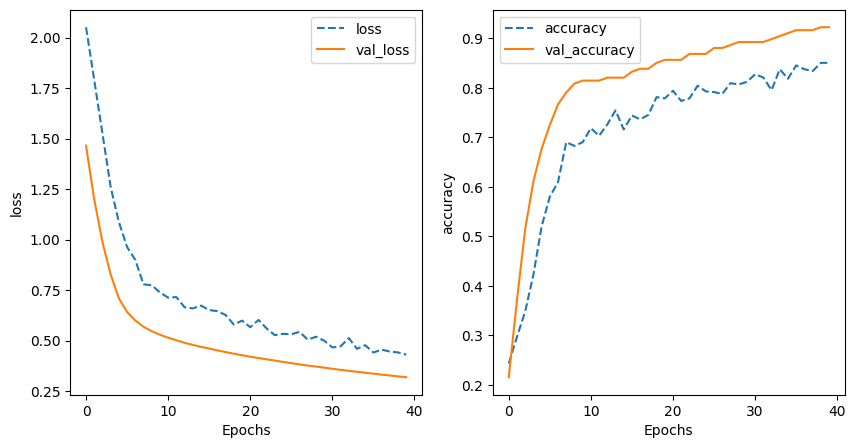

In [58]:
BATCH_SIZE = 32
history_MobileNet = model_MobileNet.fit(
    train_dataset_rs, validation_data=validation_dataset_rs, epochs=EPOCHS,
    callbacks=[lr_callback,tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3)])

training_plot(['loss', 'accuracy'], history_MobileNet)

**Loss Plot**
- Both training and validation loss decrease consistently over the epochs.
- Validation loss stabilizes at around 0.3, indicating that the model generalizes well without overfitting. <p>

=> The steady improvement in both training and validation performance shows that the pre-trained MobileNet model, combined with the additional layers, is effective in learning the new dataset.

**Accuracy Plot**
- Training accuracy steadily improves and approaches 90%.
- Validation accuracy also follows a similar trend, stabilizing near 0.90. <p>

=> The close alignment between training and validation performance further indicates that overfitting is well-controlled because of using dropout and the learning rate schedule.

In [59]:
# Evaluate the unseen data on the test dataset 
test_loss, test_accuracy = model_MobileNet.evaluate(test_dataset_rs)  
print(f"Test accuracy: {test_accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.9330 - loss: 0.3589
Test accuracy: 0.9349


2024-04-05 20:31:19.456159: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


The MobileNet model achieved an accuracy of `93.49%` on the test dataset.

In [61]:
# Check the accuracy test for each category in CLASS_NAMES for "MobileNet Model"
class_accuracies_test = check_test_accuracy(model_MobileNet, test_dataset_rs, CLASS_NAMES)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

2024-04-05 20:32:11.316403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


`Rain` and `sunrise` are the most easily distinguishable classes for the model, likely due to strong visual cues in the data. `Cloudy` and `shine` could benefit from further refinement, possibly by augmenting the dataset or tweaking the learning rate schedule for better differentiation.

## 3.3 Comparative evaluation 
Compare the evaluation results of the best systems from tasks 3.1 and 3.2

In [63]:
# Assuming 'ConvNets' is ConvNets model from Task 3.1 and 'MobileNet' is MobileNet model from Task 2.2
test_loss_model_ConvNets, test_accuracy_model_ConvNets = best_ConvNets.evaluate(test_dataset)
test_loss_model_MobileNet, test_accuracy_model_MobileNet = model_MobileNet.evaluate(test_dataset_rs)

print(f"Model 1 Test Accuracy: {test_accuracy_model_ConvNets:.4f}")
print(f"Model 2 Test Accuracy: {test_accuracy_model_MobileNet:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.8967 - loss: 0.2574


2024-04-05 20:39:15.134101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.9330 - loss: 0.3589
Model 1 Test Accuracy: 0.8876
Model 2 Test Accuracy: 0.9349


2024-04-05 20:39:16.211684: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1. *What system (including the systems you developed in Model 2) perform best on the test set?*<p>
Based on the accuracy, model using MobileNet (model from task 3.2) perform the best on the test set, with 93.49%.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

2024-04-05 20:49:32.462818: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


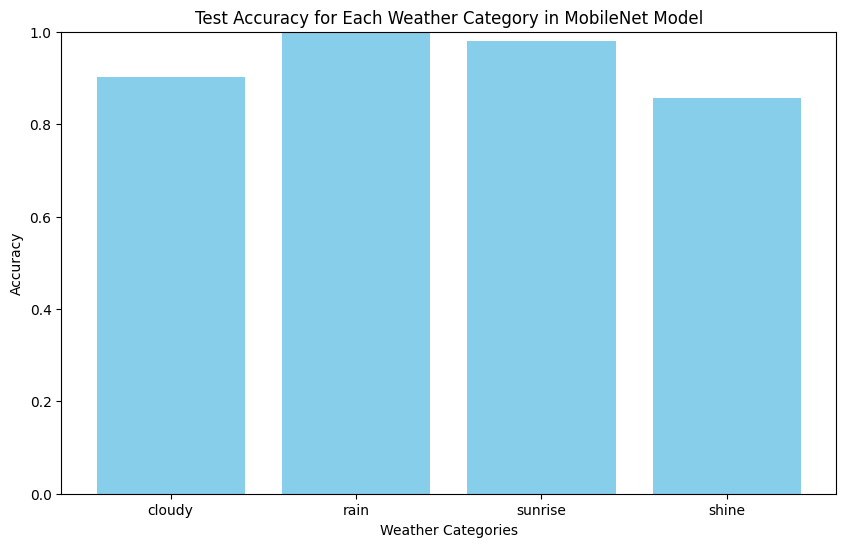

In [65]:
# Check the accuracy test for each category in CLASS_NAMES for "MobileNet Model"
class_accuracies_test = check_test_accuracy(model_MobileNet, test_dataset_rs, CLASS_NAMES)
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(CLASS_NAMES, class_accuracies_test, color='skyblue')
plt.xlabel('Weather Categories')
plt.ylabel('Accuracy')
plt.title('Test Accuracy for Each Weather Category in MobileNet Model')
plt.ylim(0, 1)  # Set y-axis range to show accuracy from 0 to 1 for clarity
plt.show()

2. *Report the accuracy of your best system on each of the different weather categories. What type of weather was most difficult to detect?*<p>
 Based on the accuracy reports for different weather categories from MobileNet Model (task 3.2), it appears that the system performed best on `rain` with perfect accuracy **(1.0)**. The category `sunrise`, `cloudy` also had high accuracy, **0.98** and **0.9** relatively. The most difficult weather to detect was `shine`, with the lowest accuracy of **0.86**, indicating that the system was less effective at correctly identifying this category compared to others.